In [1]:
import pandas as pd
import numpy as np

# Kyler Murray Case Study on Call of Duty Release

I wanted to put to the test if Kyler Murray actually performs worse once Call of Duty is released. Through visulazations and the numerous stats collected we can explore how Kyler performs after the release.


In [84]:
college=pd.read_csv('Kyler_college.csv')
NFL=pd.read_csv('Kyler_NFL.csv')
tua_college=pd.read_csv('Tua_college.csv')

In [3]:
college.head()

,Rk,Year,Date,School,Unnamed: 4,Opponent,Unnamed: 6,P_Cmp,P_Att,Pct,...,P_Rating,R_Att,R_Yds,R_Avg,R_TD,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,15.0,2017.0,1/1/2018,Oklahoma,N,Georgia*,L,0.0,0.0,NaN,...,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,16.0,2018.0,9/1/2018,Oklahoma,NaN,Florida Atlantic,W,9.0,11.0,81.8,...,301.4,4.0,23.0,5.8,0.0,NaN,NaN,NaN,NaN,NaN
2,17.0,2018.0,9/8/2018,Oklahoma,NaN,UCLA,W,19.0,33.0,57.6,...,159.4,10.0,69.0,6.9,2.0,NaN,NaN,NaN,NaN,NaN
3,18.0,2018.0,9/15/2018,Oklahoma,@,Iowa State,W,21.0,29.0,72.4,...,207.4,15.0,77.0,5.1,0.0,NaN,NaN,NaN,NaN,NaN
4,19.0,2018.0,9/22/2018,Oklahoma,NaN,Army,W,11.0,15.0,73.3,...,218.4,7.0,71.0,10.1,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
college.rename(columns={'Unnamed: 6':'Result'},inplace=True)

In [5]:
college=college.loc[1:14,'Rk':'R_TD']
college.drop(columns='Unnamed: 4',inplace=True)

In [6]:
college.dtypes

Rk          float64
Year        float64
Date         object
School       object
Opponent     object
Result       object
P_Cmp       float64
P_Att       float64
Pct         float64
P_Yds       float64
P_TD        float64
Int         float64
P_Rating    float64
R_Att       float64
R_Yds       float64
R_Avg       float64
R_TD        float64
dtype: object

In [7]:
college['Date']=pd.to_datetime(college['Date'])
tua_college=tua_college.loc[0:13,'Rk':'R_TD']
tua_college['Date']=pd.to_datetime(tua_college['Date'])

In [8]:
college

,Rk,Year,Date,School,Opponent,Result,P_Cmp,P_Att,Pct,P_Yds,P_TD,Int,P_Rating,R_Att,R_Yds,R_Avg,R_TD
1,16.0,2018.0,2018-09-01,Oklahoma,Florida Atlantic,W,9.0,11.0,81.8,209.0,2.0,0.0,301.4,4.0,23.0,5.8,0.0
2,17.0,2018.0,2018-09-08,Oklahoma,UCLA,W,19.0,33.0,57.6,306.0,3.0,1.0,159.4,10.0,69.0,6.9,2.0
3,18.0,2018.0,2018-09-15,Oklahoma,Iowa State,W,21.0,29.0,72.4,348.0,3.0,0.0,207.4,15.0,77.0,5.1,0.0
4,19.0,2018.0,2018-09-22,Oklahoma,Army,W,11.0,15.0,73.3,165.0,3.0,1.0,218.4,7.0,71.0,10.1,1.0
5,20.0,2018.0,2018-09-29,Oklahoma,Baylor,W,17.0,21.0,81.0,432.0,6.0,0.0,348.0,10.0,45.0,4.5,1.0
6,21.0,2018.0,2018-10-06,Oklahoma,Texas,L,19.0,26.0,73.1,304.0,4.0,1.0,214.4,11.0,92.0,8.4,1.0
7,22.0,2018.0,2018-10-20,Oklahoma,Texas Christian,W,19.0,24.0,79.2,213.0,4.0,0.0,208.7,9.0,51.0,5.7,0.0
8,23.0,2018.0,2018-10-27,Oklahoma,Kansas State,W,19.0,24.0,79.2,352.0,3.0,0.0,243.6,5.0,46.0,9.2,1.0
9,24.0,2018.0,2018-11-03,Oklahoma,Texas Tech,W,20.0,35.0,57.1,360.0,3.0,2.0,160.4,11.0,100.0,9.1,1.0
10,25.0,2018.0,2018-11-10,Oklahoma,Oklahoma State,W,21.0,29.0,72.4,349.0,1.0,0.0,184.9,14.0,66.0,4.7,0.0


In [9]:
tua_college

,Rk,Date,School,Opponent,Result,P_Cmp,P_Att,P_Pct,P_Yds,P_TD,Int,P_Rating,R_Att,R_Yds,R_Avg,R_TD
0,1.0,2018-09-01,Alabama,Louisville,W,12,16,75.0,227,2,0,235.4,5,26,5.2,1
1,2.0,2018-09-08,Alabama,Arkansas State,W,13,19,68.4,228,4,0,238.7,4,20,5.0,0
2,3.0,2018-09-15,Alabama,Mississippi,W,11,15,73.3,191,2,0,224.3,5,47,9.4,0
3,4.0,2018-09-22,Alabama,Texas A&M,W,22,30,73.3,387,4,0,225.7,4,10,2.5,1
4,5.0,2018-09-29,Alabama,Louisiana,W,8,8,100.0,128,2,0,316.9,2,12,6.0,0
5,6.0,2018-10-06,Alabama,Arkansas,W,10,13,76.9,334,4,0,394.3,3,7,2.3,0
6,7.0,2018-10-13,Alabama,Missouri,W,12,22,54.5,265,3,0,200.7,2,-5,-2.5,0
7,8.0,2018-10-20,Alabama,Tennessee,W,19,29,65.5,306,4,0,199.7,1,6,6.0,0
8,9.0,2018-11-03,Alabama,Louisiana State,W,25,42,59.5,295,2,1,129.5,3,49,16.3,1
9,10.0,2018-11-10,Alabama,Mississippi State,W,14,21,66.7,164,1,1,138.5,8,-24,-3.0,0


# Call of Duty Release Date= October 12th, 2018

In [10]:
before_COD=college.loc[1:6,:]
after_COD=college.loc[7:,:]

In [26]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8


Text(0.5, 0.98, 'Kyler Murray College')

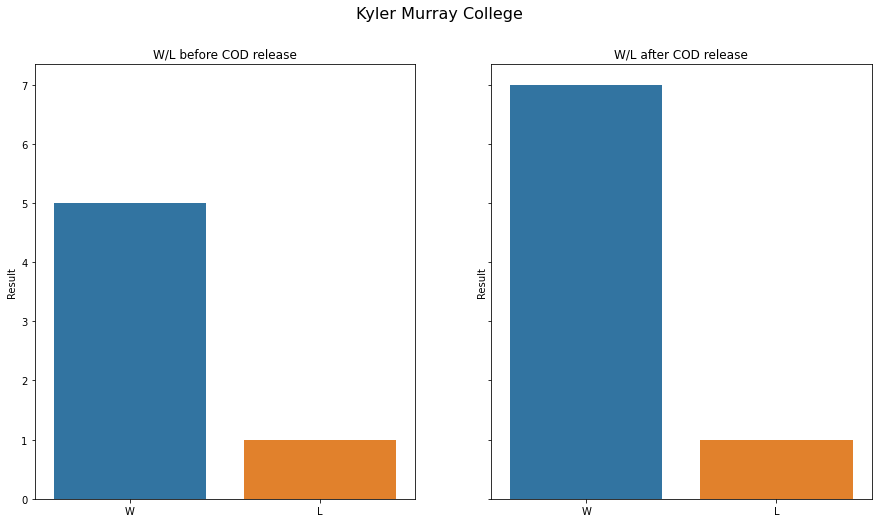

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 2, sharey=True)

#create chart in each subplot
sns.barplot(x=before_COD['Result'].value_counts().index, y=before_COD["Result"].value_counts(), ax=axes[0]).set(title='W/L before COD release')
sns.barplot(x=after_COD['Result'].value_counts().index, y=after_COD["Result"].value_counts(), ax=axes[1]).set(title='W/L after COD release')
fig.suptitle('Kyler Murray College', fontsize=16)

# To determine pass-efficiency rating points, multiply a player's yards per attempt by 8.4, add his completion percentage, add his touchdown percentage multiplied by 3.3, then subtract his interception percentage multiplied by 2. 

Text(2018-10-12 00:00:00, 175, 'Call of Duty Release')

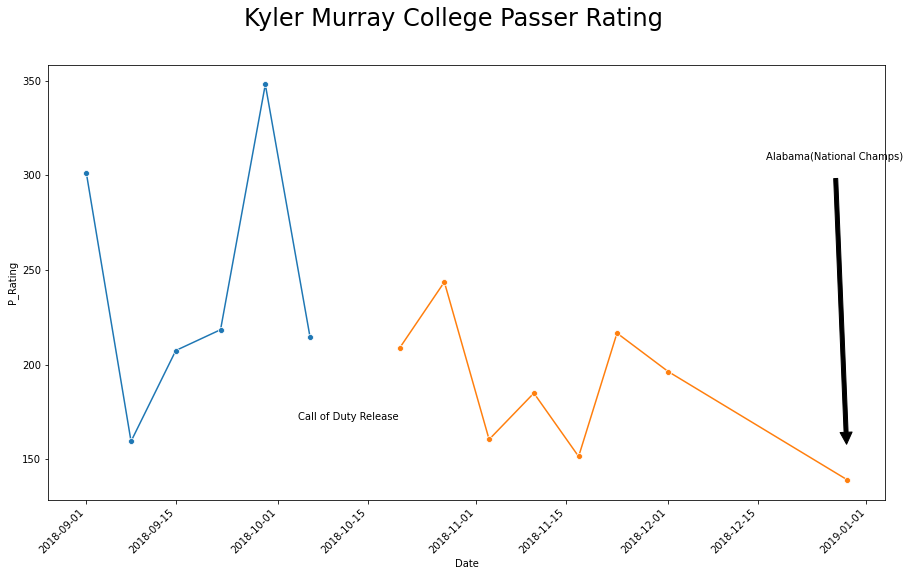

In [31]:
import matplotlib.dates as mdates
fig, axes = plt.subplots(1,1, sharey=True)

sns.lineplot(x=before_COD.Date,y=before_COD.P_Rating, marker='o')
sns.lineplot(x=after_COD.Date,y=after_COD.P_Rating, marker='o')
axes.annotate('Alabama(National Champs)', xy=(pd.to_datetime('2018-12-29'),150),xytext=(0.94, 0.8),textcoords='axes fraction',arrowprops=dict(facecolor='black', shrink=0.05),verticalalignment='top', horizontalalignment='center')
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')
fig.suptitle('Kyler Murray College Passer Rating', fontsize=24)
axes.annotate('Call of Duty Release', xy=(pd.to_datetime('2018-10-12'),175 ),verticalalignment='top', horizontalalignment='center')

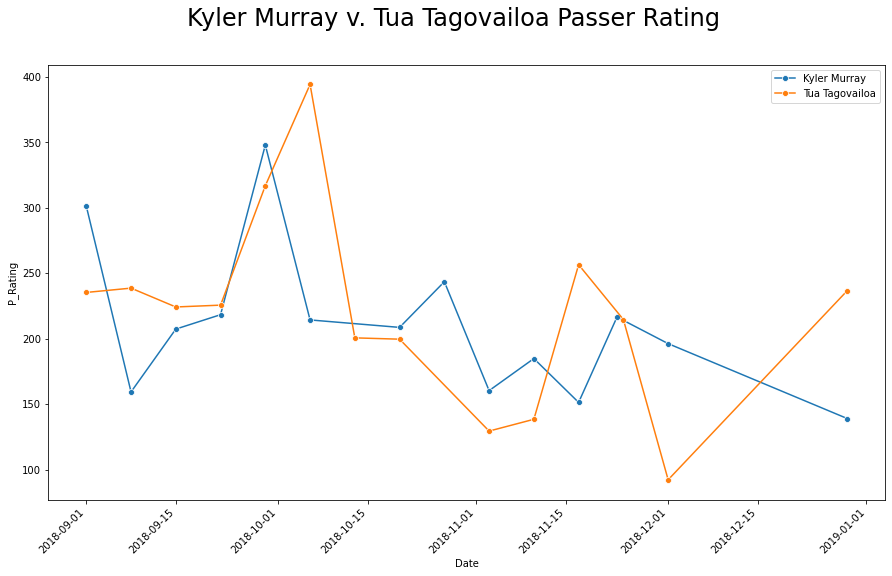

In [28]:
fig, axes = plt.subplots(1,1, sharey=True)

sns.lineplot(x=college.Date,y=college.P_Rating, marker='o')
sns.lineplot(x=tua_college.Date,y=tua_college.P_Rating, marker='o')
fig.suptitle('Kyler Murray v. Tua Tagovailoa Passer Rating', fontsize=24)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')
axes.legend(['Kyler Murray','Tua Tagovailoa'])

[Text(0.5, 1.0, 'Kyler Murray Passer Average Passer Rating Before and After COD Release')]

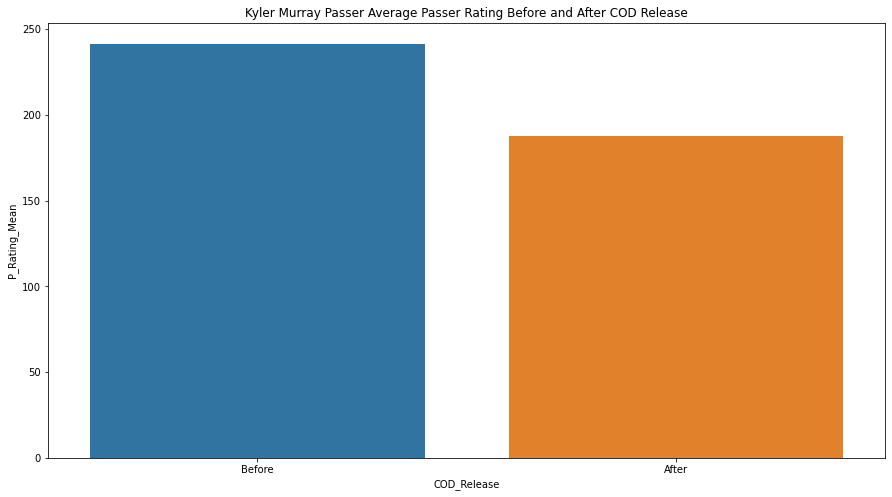

In [29]:
b=before_COD['P_Rating'].mean()
a=after_COD['P_Rating'].mean()

P_Rating_DF=pd.DataFrame(data=[['Kyler Murray',b,'Before'],['Kyler Murray',a,'After']],columns=['Player','P_Rating_Mean','COD_Release'])

sns.barplot(x=P_Rating_DF.COD_Release, y=P_Rating_DF.P_Rating_Mean).set(title='Kyler Murray Passer Average Passer Rating Before and After COD Release')

In [16]:
before_COD_tua=tua_college.loc[1:6,:]
after_COD_tua=tua_college.loc[7:,:]

In [17]:
b=before_COD_tua['P_Rating'].mean()
a=after_COD_tua['P_Rating'].mean()

P_Rating_DF_tua=pd.DataFrame(data=[['Tua Tagovailoa',b,'Before'],['Tua Tagovailoa',a,'After']],columns=['Player','P_Rating_Mean','COD_Release'])

P_Rating_Players=pd.concat([P_Rating_DF,P_Rating_DF_tua],axis=0)

P_Rating_Players.rename({'index':'Players'},inplace=True, axis=0)
P_Rating_Players

,Player,P_Rating_Mean,COD_Release
0,Kyler Murray,241.500000,Before
1,Kyler Murray,187.625000,After
0,Tua Tagovailoa,266.766667,Before
1,Tua Tagovailoa,181.142857,After


Text(0.5, 0.98, 'Kyler Murray v. Tua Tagovailoa Passer Rating Average Before and After Call of Duty Release')

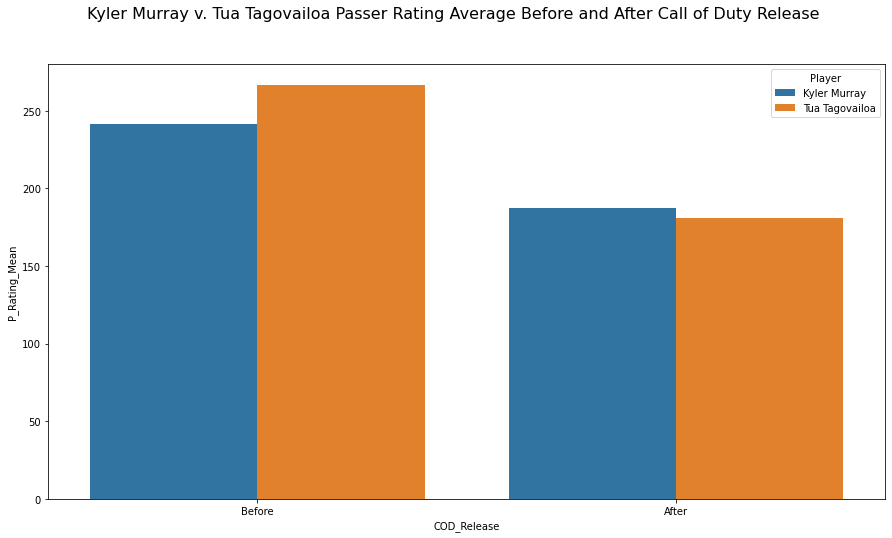

In [30]:
fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(x='COD_Release',y='P_Rating_Mean',hue='Player',data=P_Rating_Players,ci=None)
fig.suptitle('Kyler Murray v. Tua Tagovailoa Passer Rating Average Before and After Call of Duty Release', fontsize=16)

In [19]:
college.head()

,Rk,Year,Date,School,Opponent,Result,P_Cmp,P_Att,Pct,P_Yds,P_TD,Int,P_Rating,R_Att,R_Yds,R_Avg,R_TD
1,16.0,2018.0,2018-09-01,Oklahoma,Florida Atlantic,W,9.0,11.0,81.8,209.0,2.0,0.0,301.4,4.0,23.0,5.8,0.0
2,17.0,2018.0,2018-09-08,Oklahoma,UCLA,W,19.0,33.0,57.6,306.0,3.0,1.0,159.4,10.0,69.0,6.9,2.0
3,18.0,2018.0,2018-09-15,Oklahoma,Iowa State,W,21.0,29.0,72.4,348.0,3.0,0.0,207.4,15.0,77.0,5.1,0.0
4,19.0,2018.0,2018-09-22,Oklahoma,Army,W,11.0,15.0,73.3,165.0,3.0,1.0,218.4,7.0,71.0,10.1,1.0
5,20.0,2018.0,2018-09-29,Oklahoma,Baylor,W,17.0,21.0,81.0,432.0,6.0,0.0,348.0,10.0,45.0,4.5,1.0


In [20]:
def create_lineplot(x, y, df,axes):
    if type(y)==list:
        a=0
        b=0
        colors=['r','g','y','m','c','k']
        for col in y:
            axes=axes.flatten(order='C')
            if b> len(colors):
                b=0
            sns.lineplot(data=df,x=x,y=col,marker='o',color=colors[b], ax=axes[a]).set(title=col)
            a+=1
            b+=1
            
    else:
        sns.lineplot(data=df,x=x,y=y, marker='o')
        
        

In [35]:
rcParams['figure.figsize'] = 15,12

Text(0.5, 0.98, 'Kyler Murray College Stats')

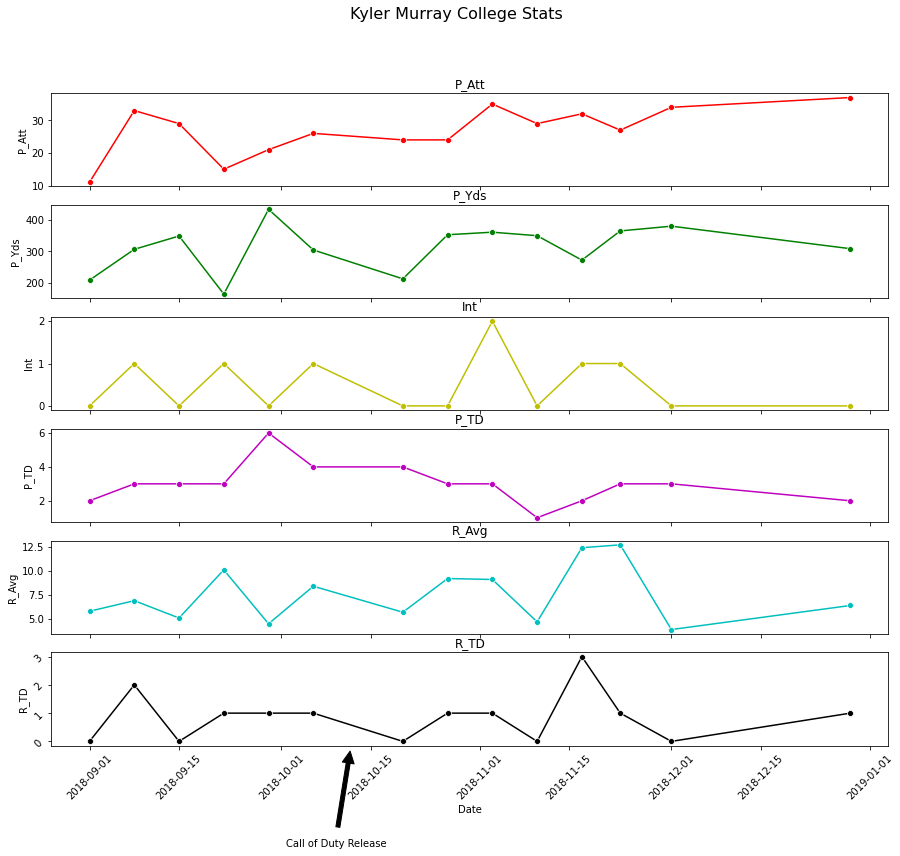

In [59]:
fig, axes = plt.subplots(6, 1, sharex=True)
create_lineplot('Date',['P_Att','P_Yds','Int','P_TD','R_Avg','R_TD'],college,axes)
axes[5].annotate('Call of Duty Release', xy=(pd.to_datetime('2018-10-12'),0 ),xytext=(.4, -1),textcoords='axes fraction',arrowprops=dict(facecolor='black', shrink=0.1), verticalalignment='top',horizontalalignment='right')
plt.tick_params(labelrotation=45)
fig.suptitle('Kyler Murray College Stats', fontsize=16)

# NFL Season (2020)

In [76]:
NFL.columns

Index(['Rk', 'Date', 'G#', 'Tm', 'Unnamed: 4', 'Opp', 'Result', 'P_Cmp',
       'P_Att', 'P_Cmp.1', 'P_Yds', 'P_TD', 'Int', 'P_Rating', 'Y/A', 'R_Att',
       'R_Yds', 'R_Y/A', 'R_TD', 'Fmb', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'],
      dtype='object')

In [85]:
NFL=NFL.loc[0:15,'Rk':'Fmb']
NFL.drop('Unnamed: 4',inplace=True,axis=1)
NFL.rename({'P_Cmp.1':'Pct'},inplace=True,axis=1)
NFL['Date']=pd.to_datetime(NFL['Date'])
NFL[['Result','Score']]=NFL['Result'].str.split(expand=True)
NFL.head()


,Rk,Date,G#,Tm,Opp,Result,P_Cmp,P_Att,Pct,P_Yds,P_TD,Int,P_Rating,Y/A,R_Att,R_Yds,R_Y/A,R_TD,Fmb,Score
0,1.0,2020-09-13,1.0,ARI,SFO,W,26.0,40.0,65.00,230.0,1.0,1.0,78.1,5.75,13.0,91.0,7.00,1.0,0.0,24-20
1,2.0,2020-09-20,2.0,ARI,WAS,W,26.0,38.0,68.42,286.0,1.0,1.0,88.3,7.53,8.0,67.0,8.38,2.0,0.0,30-15
2,3.0,2020-09-27,3.0,ARI,DET,L,23.0,35.0,65.71,270.0,2.0,3.0,72.3,7.71,5.0,29.0,5.80,1.0,0.0,23-26
3,4.0,2020-10-04,4.0,ARI,CAR,L,24.0,31.0,77.42,133.0,3.0,0.0,116.7,4.29,6.0,78.0,13.00,0.0,1.0,21-31
4,5.0,2020-10-11,5.0,ARI,NYJ,W,27.0,37.0,72.97,380.0,1.0,1.0,103.4,10.27,9.0,31.0,3.44,1.0,0.0,30-10


# Call of Duty Release= November 13th, 2020

Text(0.5, 0.98, 'Kyler Murray NFL')

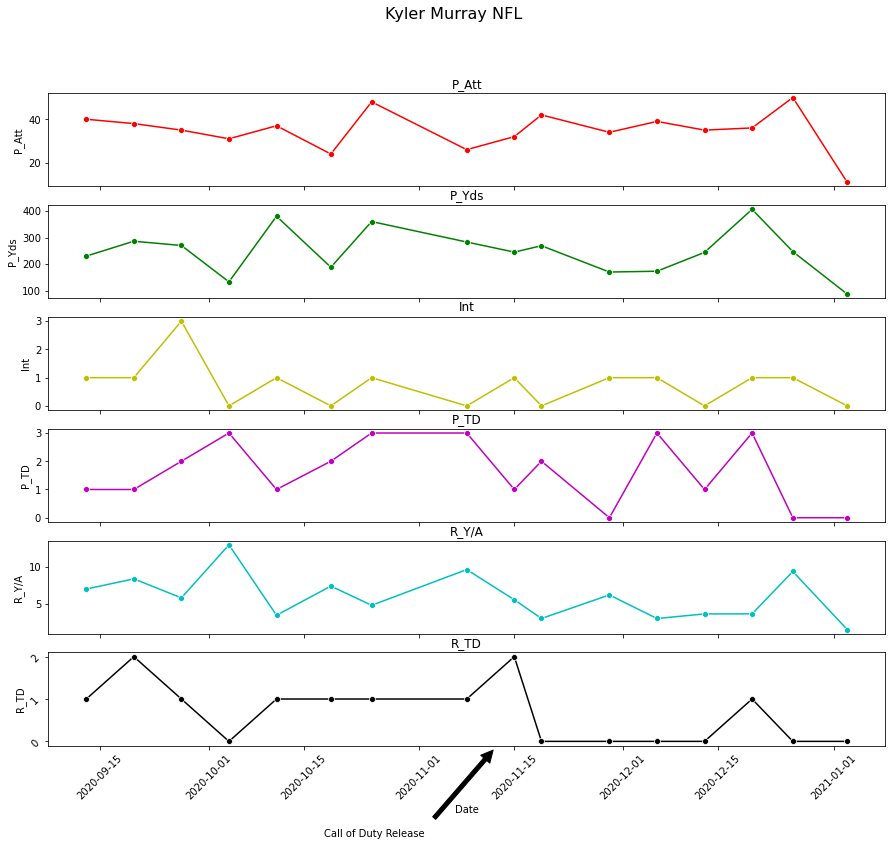

In [62]:
#Use function from before to plot line plots to try and see trends
fig, axes = plt.subplots(6, 1, sharex=True)
create_lineplot('Date',['P_Att','P_Yds','Int','P_TD','R_Y/A','R_TD'],NFL,axes)
plt.tick_params(labelrotation=45)
axes[5].annotate('Call of Duty Release', xy=(pd.to_datetime('2020-11-13'),0 ),xytext=(.45, -1),textcoords='axes fraction',arrowprops=dict(facecolor='black', shrink=0.1), verticalalignment='bottom',horizontalalignment='right')
plt.tick_params(labelrotation=45)
fig.suptitle('Kyler Murray NFL', fontsize=16)

In [86]:
before_COD_NFL=NFL[NFL['Date']<=pd.to_datetime('2020-11-13')]
after_COD_NFL=NFL[NFL['Date']> pd.to_datetime('2020-11-13')]

Text(0.5, 0.98, 'Kyler Murray NFL')

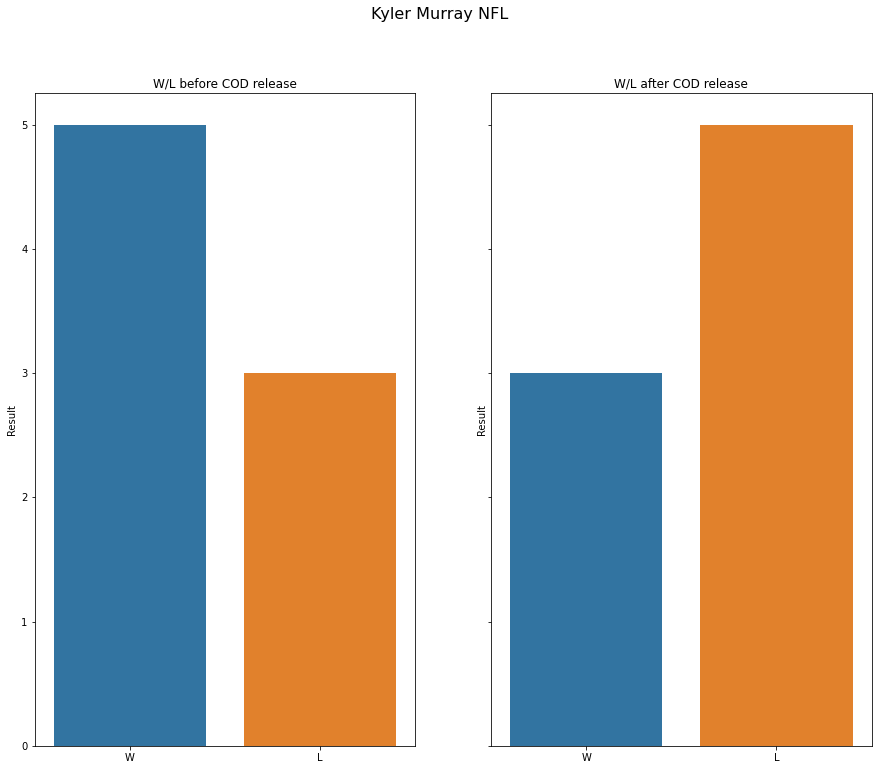

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 2, sharey=True)

#create chart in each subplot
sns.barplot(x=before_COD_NFL['Result'].value_counts().index, y=before_COD_NFL["Result"].value_counts(), ax=axes[0]).set(title='W/L before COD release')
sns.barplot(x=after_COD_NFL['Result'].value_counts().sort_values().index, y=after_COD_NFL["Result"].value_counts().sort_values(), ax=axes[1]).set(title='W/L after COD release')
fig.suptitle('Kyler Murray NFL W/L Before and After COD Release', fontsize=16)